Predicting
Heart Disease

Problem Statement:
You are the data scientist at a medical research facility. The facility wants you to
build a machine learning model to classify if the given data of a patient should tell
if the patient is at the risk of a heart attack.

Heart Disease Dataset:
UCI Heart Disease Dataset
(https://archive.ics.uci.edu/ml/datasets/Heart+Disease?spm=5176.100239.blogco
nt54260.8.TRNGoO)
Lab Environment:
Jupyter Notebooks

Domain:
Healthcare


### Tasks To Be Performed:
1. Data Analysis:
a. Import the dataset
b. Get information about the dataset (mean, max, min, quartiles etc.)
c. Find the correlation between all fields


In [141]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [142]:
df=pd.read_csv('heart disease.csv')

In [143]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [145]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [146]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [147]:
df.target.unique()

array([1, 0], dtype=int64)

In [148]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


2. Data Visualization:
a. Visualize the number of patients having a heart disease and not having
a heart disease



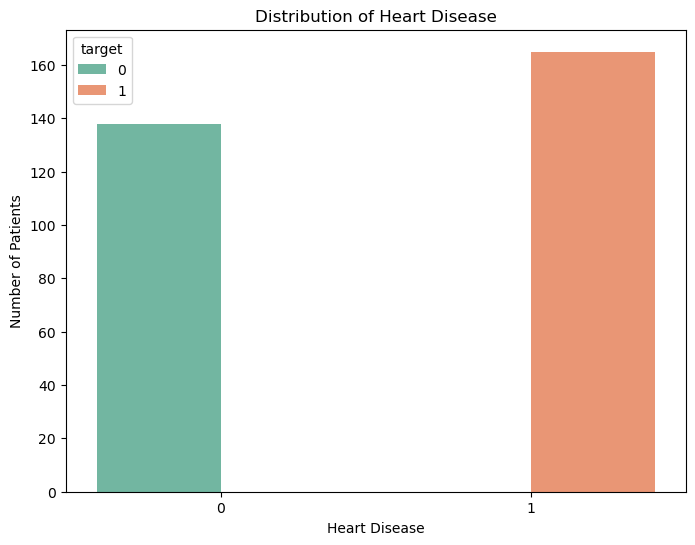

In [149]:
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df, palette='Set2', hue= df['target'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')
plt.show()

b. Visualize the age and whether a patient has disease or not


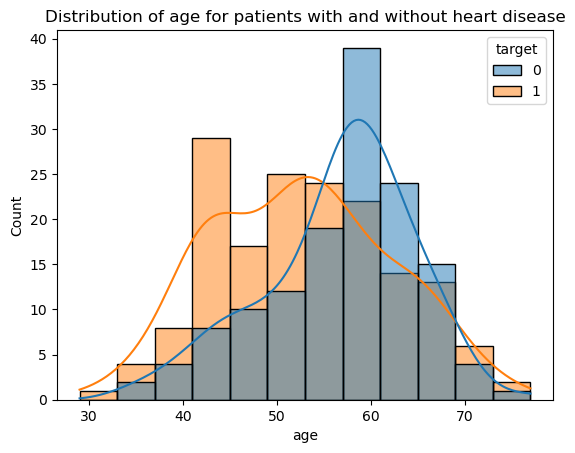

In [150]:
sns.histplot(x='age', hue='target', data=df, kde=True)
plt.title('Distribution of age for patients with and without heart disease')
plt.show()

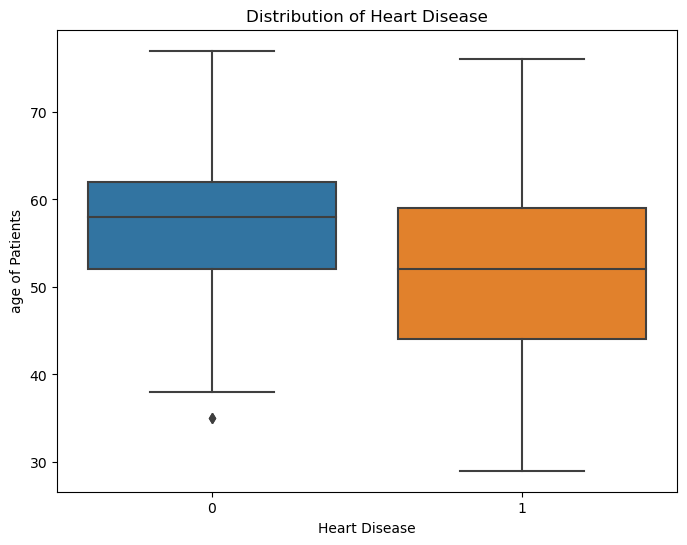

In [151]:
plt.figure(figsize=(8, 6))
sns.boxplot(x= df['target'], y=df['age'])
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('age of Patients')
plt.show()

c. Visualize correlation between all features using a heat map

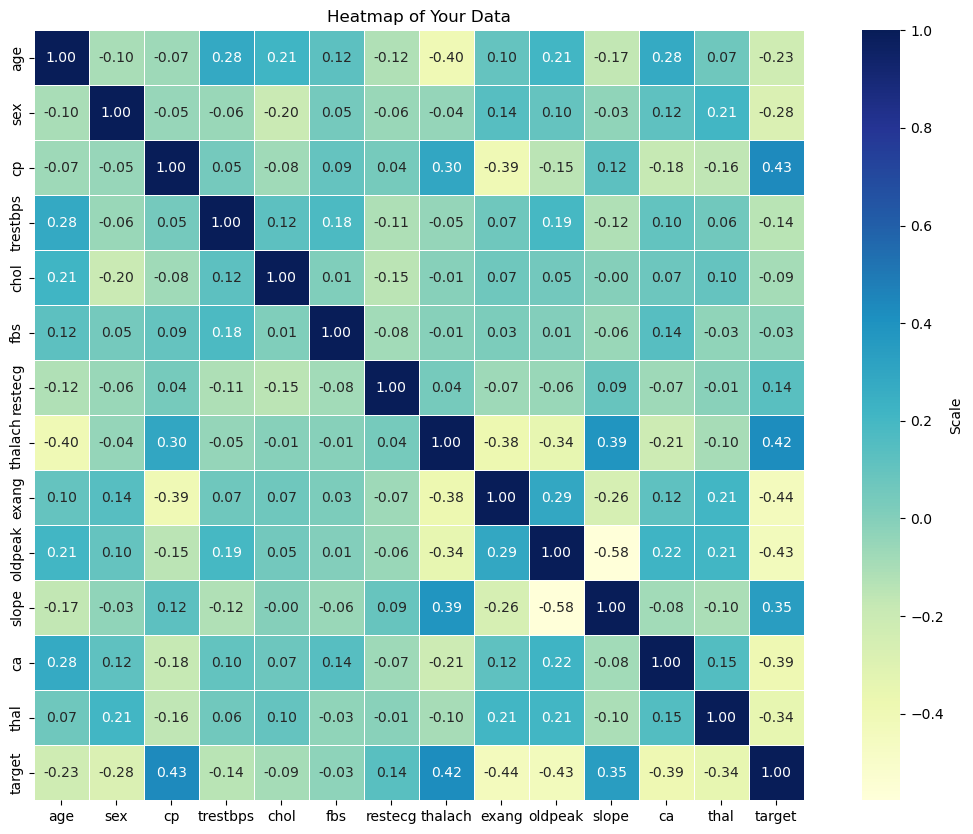

In [152]:
plt.figure(figsize=(15,10))
sns.heatmap(
    df.corr(),
    cmap="YlGnBu",          # Color map (e.g., "viridis", "YlGnBu", "coolwarm")
    annot=True,             # Show data values in each cell
    fmt=".2f",              # Format for annot values (e.g., ".2f", ".0f")
    linewidths=0.5,         # Width of the lines between cells
    linecolor='white',      # Color of the lines between cells
    cbar=True,              # Display color bar
    cbar_kws={'label': 'Scale'},  # Color bar label
    square=True,            # Force square shape of cells
    xticklabels='auto',     # Whether to show x-axis labels ("auto", True, False)
    yticklabels='auto',     # Whether to show y-axis labels ("auto", True, False)
    mask=None,              # Boolean mask for cells to be hidden
    ax=None                 # Axis where the plot will be drawn
)

# Set the title
plt.title('Heatmap of Your Data')

# Show the plot
plt.show()

In [153]:
#feature selection

In [154]:
X= df.drop(['target'], axis=1)
y= df['target']

In [155]:
from sklearn.model_selection import train_test_split 

3. Logistic Regression:
a. Build a simple logistic regression model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and get the accuracy score


In [156]:
X_train,X_test, y_train, y_test= train_test_split(X,y,test_size= 0.30, random_state= 512)

In [157]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [158]:
lr.fit(X_train, y_train)

LogisticRegression()

In [159]:
y_pred_lr= lr.predict(X_test)
y_pred_lr

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1], dtype=int64)

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_recall_fscore_support
accuracy_score(y_test,y_pred_lr)

0.8461538461538461

In [161]:
confusion_matrix(y_test,y_pred_lr)

array([[23, 12],
       [ 2, 54]], dtype=int64)

4. Decision Tree:
a. Build a decision tree model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and calculate the accuracy
iv. Visualize the decision tree using the Graphviz package


In [162]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [163]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [164]:
y_pred_dt= dt.predict(X_test)
y_pred_dt

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1], dtype=int64)

In [165]:
accuracy_score(y_test,y_pred_dt)

0.7802197802197802

In [166]:
confusion_matrix(y_test,y_pred_dt)

array([[27,  8],
       [12, 44]], dtype=int64)

In [167]:
!pip install graphviz


In [168]:
from sklearn.tree import export_graphviz
import graphviz
from pathlib import Path

In [169]:
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_visualization", format='png', cleanup=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

5. Random Forest:
a. Build a Random Forest model:
i. Divide the dataset in 70:30 ratio
ii. Build the model on train set and predict the values on test set
iii. Build the confusion matrix and calculate the accuracy
iv. Visualize the model using the Graphviz package


In [170]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [171]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [172]:
y_pred_rf= dt.predict(X_test)
y_pred_rf

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1], dtype=int64)

In [173]:
accuracy_score(y_test,y_pred_rf)

0.7802197802197802

In [174]:
confusion_matrix(y_test,y_pred_rf)

array([[27,  8],
       [12, 44]], dtype=int64)

In [175]:
estimator = rf.estimators_[0]

# Export the decision tree to a DOT file
dot_data_rf = export_graphviz(
    estimator,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Specify the path to the Graphviz executables
graph_rf = graphviz.Source(dot_data_rf, engine='dot', format='png')
graph_rf.render("random_forest_visualization", format='png', cleanup=True)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

6. Select the best model
a. Print the confusion matrix of all classifiers


In [177]:
print(confusion_matrix(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_rf))

[[23 12]
 [ 2 54]]
[[27  8]
 [12 44]]
[[27  8]
 [12 44]]


b. Print the classification report of all classifiers


In [178]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77        35
           1       0.82      0.96      0.89        56

    accuracy                           0.85        91
   macro avg       0.87      0.81      0.83        91
weighted avg       0.86      0.85      0.84        91



In [179]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73        35
           1       0.85      0.79      0.81        56

    accuracy                           0.78        91
   macro avg       0.77      0.78      0.77        91
weighted avg       0.79      0.78      0.78        91



In [ ]:
print(classification_report(y_test,y_pred_rf))

c. Calculate Recall Precision and F1 score of all the models


In [185]:
print("Logistic Regression Recall Precision and F1 score:\n\n",precision_recall_fscore_support(y_test,y_pred_lr))
print("\nDecision Tree Recall Precision and F1 score:\n\n",precision_recall_fscore_support(y_test,y_pred_dt))
print("\nRandom Forest Recall Precision and F1 score:\n\n",precision_recall_fscore_support(y_test,y_pred_rf))

Logistic Regression Recall Precision and F1 score:

 (array([0.92      , 0.81818182]), array([0.65714286, 0.96428571]), array([0.76666667, 0.8852459 ]), array([35, 56], dtype=int64))

Decision Tree Recall Precision and F1 score:

 (array([0.69230769, 0.84615385]), array([0.77142857, 0.78571429]), array([0.72972973, 0.81481481]), array([35, 56], dtype=int64))

Random Forest Recall Precision and F1 score:

 (array([0.69230769, 0.84615385]), array([0.77142857, 0.78571429]), array([0.72972973, 0.81481481]), array([35, 56], dtype=int64))


d. Visualize confusion matrix using heatmaps


<Axes: >

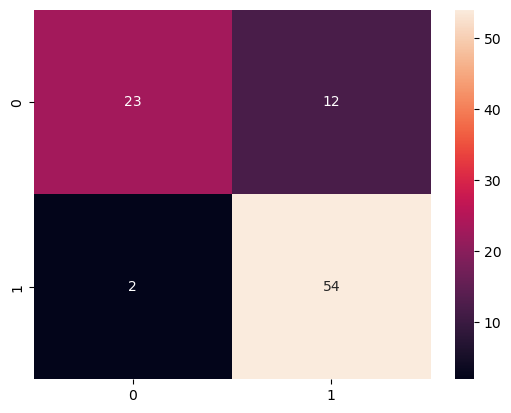

In [186]:
sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot= True)

<Axes: >

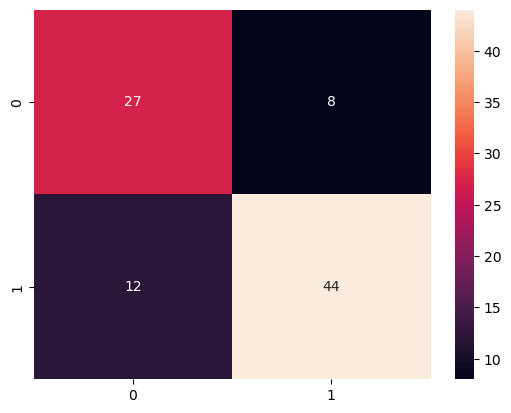

In [187]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt), annot= True)

<Axes: >

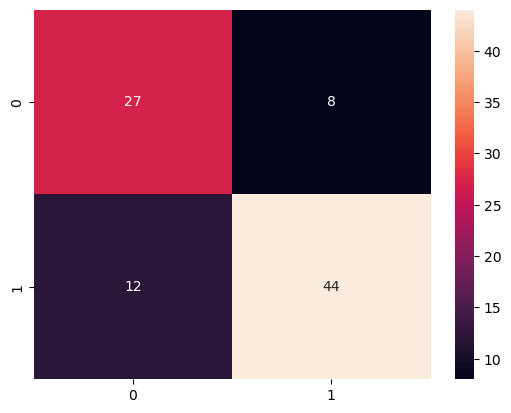

In [188]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot= True)

e. Select the best model based on the best accuracies

Final output:

In this case, the best model is Logistic regression with the accuracy score of 85% 